# Elections Ad Spending Analysis in Argentina using Python(2023)

#### We collected data from Ads Transparency Center (Google) about how much money was spent during Argentina elections 2023 by political parties in formats like text, videos or image. In particular, we perform elections ad spending analysis - EDA - using Python.

## Data Collection

We extract the dataset from Ads Transparency Center which format is in Google Sheet. We transform this and download it in a .csv format. 

We import the library pandas for dataframe manipulation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import numpy as np

In [4]:
#Dataset is downloaded
df_ads = pd.read_csv("/home/andy/Descargas/ds_googleads.csv") #que aparezca sólo el nombre de la carpeta

#Cheching the size of the dataset
print("Shape of dataset: ", df_ads.shape)


Shape of dataset:  (5813, 22)


In [3]:
#Let's check the first five rows
df_ads.head()

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00","15.000,00"


In [3]:
# Let's see the column names
df_ads.keys()

Index(['Ad_ID', 'Ad_URL', 'Ad_Type', 'Regions', 'Advertiser_ID',
       'Advertiser_Name', 'Ad_Campaigns_List', 'Date_Range_Start',
       'Date_Range_End', 'Num_of_Days', 'Impressions', 'Spend_USD',
       'First_Served_Timestamp', 'Last_Served_Timestamp', 'Age_Targeting',
       'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
       'Spend_Range_Min_USD', 'Spend_Range_Max_USD', 'Spend_Range_Min_ARS',
       'Spend_Range_Max_ARS'],
      dtype='object')

In [4]:
# Let's check it out the first URL 
df_ads['Ad_URL'][0]

'https://adstransparency.google.com/advertiser/AR14823408713892626433/creative/CR10079170796300795905?political=&region=AR'

In [5]:
#Checking number of elements from 'Advertiser_ID' column
len(df_ads['Advertiser_ID'].unique())

145

In [ ]:
df_ads['Date_Range_Start'][0]

: 

In [6]:
#Let's check one Ad_ID element from the same column
ucrn = 'AR16124137016865587201'
df_ads[df_ads['Advertiser_ID'] == ucrn]

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
292,CR07669889306558726145,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-04-11,2023-04-14,4,...,2023-04-11T17:10:00Z,2023-04-14T21:52:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","90.000,00","105.000,00"
293,CR05370018844507111425,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-04-09,2023-04-16,9,...,2023-04-09T03:09:00Z,2023-04-16T20:13:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","60.000,00","75.000,00"
294,CR05754818227414761473,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-24,2023-04-16,24,...,2023-03-24T12:37:00Z,2023-04-16T20:13:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","60.000,00","75.000,00"
295,CR05090480107772968961,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-25,2023-04-14,22,...,2023-03-25T03:14:00Z,2023-04-14T21:52:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Neuquen,Argentina",NaN,"0,00","100,00","15.000,00","30.000,00"
296,CR11241685264982081537,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-09,2023-03-24,15,...,2023-03-09T10:56:00Z,2023-03-24T09:39:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Neuquen,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
297,CR01052333439254003713,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-04-09,2023-04-16,8,...,2023-04-09T08:13:00Z,2023-04-16T19:43:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
298,CR09629849047418273793,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-23,2023-04-08,17,...,2023-03-23T20:59:00Z,2023-04-08T10:53:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","15.000,00","30.000,00"
299,CR04315980268876857345,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-01,2023-03-24,23,...,2023-03-01T11:55:00Z,2023-03-24T10:10:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","135.000,00","150.000,00"
300,CR15356554755375628289,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-01,2023-04-01,30,...,2023-03-01T12:15:00Z,2023-04-01T04:15:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","450.000,00","500.000,00"
301,CR17556184391590346753,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-23,2023-04-08,17,...,2023-03-23T19:50:00Z,2023-04-08T10:53:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00

In [7]:
#Checking another element from 'Advertiser_ID'
fr = 'AR14823408713892626433'
df_ads[df_ads['Advertiser_ID'] == fr]

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"


In [8]:
#showing the first 5 rows of our dataframe
df_ads.head()


,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00","15.000,00"


### Data Cleaning & Data Preprocessing

In [9]:
# Let's check dataframe type
display(type(df_ads)) 

pandas.core.frame.DataFrame

In [10]:
display(df_ads)

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00","15.000,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,CR01746279345447501825,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T15:46:00Z,2023-01-27T13:53:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
5809,CR06369083625454960641,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T23:16:00Z,2023-01-27T22:40:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","La Pampa,Argentina",NaN,"0,00","100,00","15.000,00","30.000,00"
5810,CR14634596316563374081,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
5811,CR03606406729039872001,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00","15.000,00"


#### Checking datetime type

In [28]:
#Let's check the columns with datetime type

df_ads.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, tz]']).columns


TypeError: Invalid datetime unit in metadata string "[ns, tz]"

In [11]:
#Let's drop NaN values from the dataframe as 
#Ad_Campaigns_List, Age_Targeting, Gender_Targeting,  Geo_Targeting_Excluded.

df_ads = df_ads.drop(['Ad_Campaigns_List','Age_Targeting','Gender_Targeting', 'Geo_Targeting_Excluded','Spend_USD'],axis=1)

display(df_ads.head())


,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,First_Served_Timestamp,Last_Served_Timestamp,Geo_Targeting_Included,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,2023-04-20,2023-05-09,17,300000-350000,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,"Tucuman,Argentina","0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,2023-04-12,2023-04-19,8,2000000-2250000,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,"Tucuman,Argentina","0,00","100,00","45.000,00","60.000,00"
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,2023-03-31,2023-04-15,15,100000-125000,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,"Rio Negro,Argentina","0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,2023-03-29,2023-03-29,2,6000-7000,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,"Rio Negro,Argentina","0,00","100,00","0,00","15.000,00"
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,2022-09-12,2023-05-09,238,3000-4000,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,"Argentina, Buenos Aires Province,Argentina, Bu...","0,00","100,00","0,00","15.000,00"


In [12]:
df_ads.keys()

Index(['Ad_ID', 'Ad_URL', 'Ad_Type', 'Regions', 'Advertiser_ID',
       'Advertiser_Name', 'Date_Range_Start', 'Date_Range_End', 'Num_of_Days',
       'Impressions', 'First_Served_Timestamp', 'Last_Served_Timestamp',
       'Geo_Targeting_Included', 'Spend_Range_Min_USD', 'Spend_Range_Max_USD',
       'Spend_Range_Min_ARS', 'Spend_Range_Max_ARS'],
      dtype='object')

In [13]:
# Let's see summary statistics, for example, of Spend_Range_Max_ARS:
print(df_ads['Spend_Range_Max_ARS'])

0       45.000,00
1       60.000,00
2       15.000,00
3       15.000,00
4       15.000,00
          ...    
5808    15.000,00
5809    30.000,00
5810    15.000,00
5811    15.000,00
5812    30.000,00
Name: Spend_Range_Max_ARS, Length: 5813, dtype: object


In [14]:
# We convert the data type:'Spend_Range_Max_ARS'  to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Displaying the updated data types
print(df_ads.dtypes)


ValueError: could not convert string to float: '45.000,00'

In [15]:
#Given that the inner elements from column 'Spend_Range_Max_AR' has a typing error,
# we fix it in the following way: 

# We remove the thousand separator and replace the decimal separator
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# We convert the column to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Displaying the updated DataFrame and data types for checking output
display(df_ads)
display(df_ads.dtypes)


,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,First_Served_Timestamp,Last_Served_Timestamp,Geo_Targeting_Included,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,2023-04-20,2023-05-09,17,300000-350000,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,"Tucuman,Argentina","0,00","100,00","30.000,00",45000.0
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,2023-04-12,2023-04-19,8,2000000-2250000,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,"Tucuman,Argentina","0,00","100,00","45.000,00",60000.0
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,2023-03-31,2023-04-15,15,100000-125000,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,"Rio Negro,Argentina","0,00","100,00","0,00",15000.0
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,2023-03-29,2023-03-29,2,6000-7000,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,"Rio Negro,Argentina","0,00","100,00","0,00",15000.0
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,2022-09-12,2023-05-09,238,3000-4000,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,"Argentina, Buenos Aires Province,Argentina, Bu...","0,00","100,00","0,00",15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,CR01746279345447501825,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,2023-01-26,2023-01-27,2,300000-350000,2023-01-26T15:46:00Z,2023-01-27T13:53:00Z,"La Pampa,Argentina","0,00","100,00","0,00",15000.0
5809,CR06369083625454960641,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR15520420058504364033,Primero La Pampa,2023-01-26,2023-01-27,2,100000-125000,2023-01-26T23:16:00Z,2023-01-27T22:40:00Z,"La Pampa,Argentina","0,00","100,00","15.000,00",30000.0
5810,CR14634596316563374081,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,2023-01-26,2023-01-27,2,125000-150000,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,"La Pampa,Argentina","0,00","100,00","0,00",15000.0
5811,CR03606406729039872001,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,2023-01-26,2023-01-27,2,25000-30000,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,"La Pampa,Argentina","0,00","100,00","0,00",15000.0


Ad_ID                      object
Ad_URL                     object
Ad_Type                    object
Regions                    object
Advertiser_ID              object
Advertiser_Name            object
Date_Range_Start           object
Date_Range_End             object
Num_of_Days                 int64
Impressions                object
First_Served_Timestamp     object
Last_Served_Timestamp      object
Geo_Targeting_Included     object
Spend_Range_Min_USD        object
Spend_Range_Max_USD        object
Spend_Range_Min_ARS        object
Spend_Range_Max_ARS       float64
dtype: object

In [16]:
# Applying Descriptive statistics to the column 'Spend_Range_Max_ARS'
display(df_ads['Spend_Range_Max_ARS'].describe())

count    5.813000e+03
mean     3.287115e+04
std      9.486278e+04
min      1.500000e+04
25%      1.500000e+04
50%      1.500000e+04
75%      1.500000e+04
max      3.000000e+06
Name: Spend_Range_Max_ARS, dtype: float64

<Axes: >

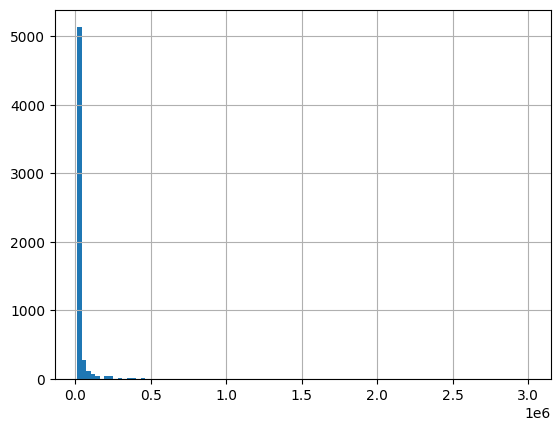

In [17]:
#Let's plot an histogram of this values
df_ads['Spend_Range_Max_ARS'].hist(bins=100)

#plt.xlim(0, 100000) #TODO (RESEARCH)

In [18]:
#We calculate the mode (most frequent value) of the column 'Spend_Range_Max_ARS':
df_ads['Spend_Range_Max_ARS'].value_counts()

Spend_Range_Max_ARS
15000.0      4730
30000.0       400
45000.0       166
60000.0       112
75000.0        82
200000.0       43
250000.0       39
120000.0       38
90000.0        35
105000.0       33
135000.0       29
150000.0       21
350000.0       17
300000.0       14
450000.0        9
400000.0        9
700000.0        8
500000.0        6
900000.0        6
600000.0        5
1500000.0       4
800000.0        3
3000000.0       2
1000000.0       2
Name: count, dtype: int64

### Ad Spend Analysis

In [19]:
# Get unique ID types
unique_ads = df_ads['Advertiser_ID'].unique()
display("Unique Ad ID:", unique_ads)

'Unique Ad ID:'

array(['AR14823408713892626433', 'AR17825122736721100801',
       'AR16558549250636513281', 'AR02334089119333875713',
       'AR02511925779277807617', 'AR05460365165205651457',
       'AR00529769647432531969', 'AR17006683664399990785',
       'AR18101017142164979713', 'AR16103202590350639105',
       'AR08037723774805606401', 'AR17570548136617705473',
       'AR09928110268150185985', 'AR08840708661442510849',
       'AR02322891418038697985', 'AR16124137016865587201',
       'AR06560599446999007233', 'AR09883561080649678849',
       'AR06644719095910498305', 'AR10741556458169565185',
       'AR03257167751197753345', 'AR11387509643883315201',
       'AR08395009665934557185', 'AR05035512222965563393',
       'AR03447316055154753537', 'AR04356388970465067009',
       'AR14377183739509735425', 'AR09596524774125731841',
       'AR14834515018283745281', 'AR02173886426876215297',
       'AR09937729895381598209', 'AR00142773440292585473',
       'AR18085903255329570817', 'AR16711046015850905601

In [20]:
#Let's clust money values that each Advertiser Id spent in advertising 
df_grouped = df_ads.groupby(['Advertiser_ID'])['Spend_Range_Max_ARS'].sum().reset_index()
display(df_grouped)


,Advertiser_ID,Spend_Range_Max_ARS
0,AR00104862416805822465,210000.0
1,AR00142773440292585473,15000.0
2,AR00331894662950289409,180000.0
3,AR00529769647432531969,845000.0
4,AR01103517904550232065,270000.0
...,...,...
140,AR18085903255329570817,150000.0
141,AR18101017142164979713,6990000.0
142,AR18187891892337770497,1980000.0
143,AR18195101527520051201,4080000.0


In [21]:
#Let's check if every Advertiser Id matches with respective Advertiser Name

unique_ids = df_ads['Advertiser_ID'].unique()  # Obtener IDs únicos

for unique_id in unique_ids:
    # Filtering the corresponding rows to ID
    df_filtered = df_ads[df_ads['Advertiser_ID'] == unique_id]
    
    # Get the unique names associate to ID 
    unique_names = df_filtered['Advertiser_Name'].unique()
    
    # Verifying if the names are equal to ID's
    if len(unique_names) == 1:
        print(f"Todos los nombres para el ID {unique_id} son iguales: {unique_names[0]}")
    else:
        print(f"Los nombres para el ID {unique_id} son diferentes: {unique_names}")


Todos los nombres para el ID AR14823408713892626433 son iguales: Fernando Rossetto
Todos los nombres para el ID AR17825122736721100801 son iguales: Guillermo Carricavur
Todos los nombres para el ID AR16558549250636513281 son iguales: NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA
Todos los nombres para el ID AR02334089119333875713 son iguales: CAMBIA RIO NEGRO- JUNTOS POR EL CAMBIO
Todos los nombres para el ID AR02511925779277807617 son iguales: MOVIMIENTO DE INTEGRACION Y DESARROLLO
Todos los nombres para el ID AR05460365165205651457 son iguales: Sergio José Basile
Todos los nombres para el ID AR00529769647432531969 son iguales: Ignacio Martin Pacheco
Todos los nombres para el ID AR17006683664399990785 son iguales: Somos Forja
Todos los nombres para el ID AR18101017142164979713 son iguales: PARTIDO JUSTICIALISTA DISTRITO TUCUMAN
Todos los nombres para el ID AR16103202590350639105 son iguales: MASSOMEDIA
Todos los nombres para el ID AR08037723774805606401 son iguales: Luciana Cuk
Todo

In [22]:
#Let's check using a random Advertiser Id the sum of spent money
df_ads[df_ads['Advertiser_ID'] == 'AR18101017142164979713' ]['Spend_Range_Max_ARS'].sum() 

np.float64(6990000.0)

In [23]:
#Indeed the values are correct
suma_elem = sum(df_ads[df_ads['Advertiser_ID'] == 'AR18101017142164979713' ]['Spend_Range_Max_ARS'].tolist())
print(suma_elem)

6990000.0


#### Bar Plot

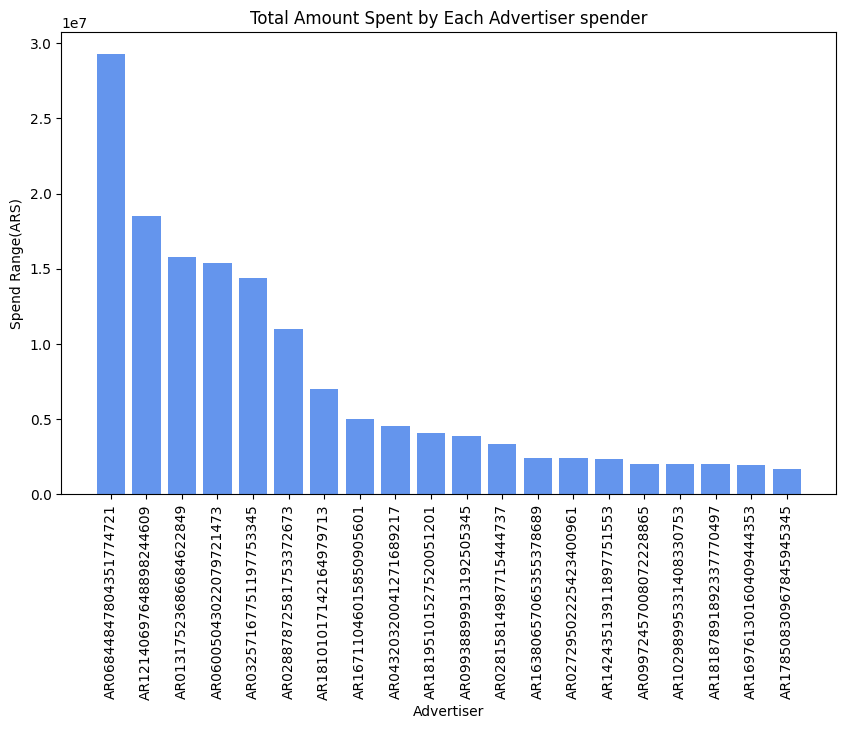

In [25]:
#Let's clust the top 20 advertiser spenders in a bar plot
df_top_advertisers = df_grouped.nlargest(20, 'Spend_Range_Max_ARS')

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_top_advertisers['Advertiser_ID'], df_top_advertisers['Spend_Range_Max_ARS'], color='cornflowerblue')

# Customizing the plot
plt.xlabel('Advertiser')
plt.ylabel('Spend Range(ARS)')
plt.title('Total Amount Spent by Each Advertiser spender')
plt.xticks(rotation=90)

# Showing the plot
plt.show()



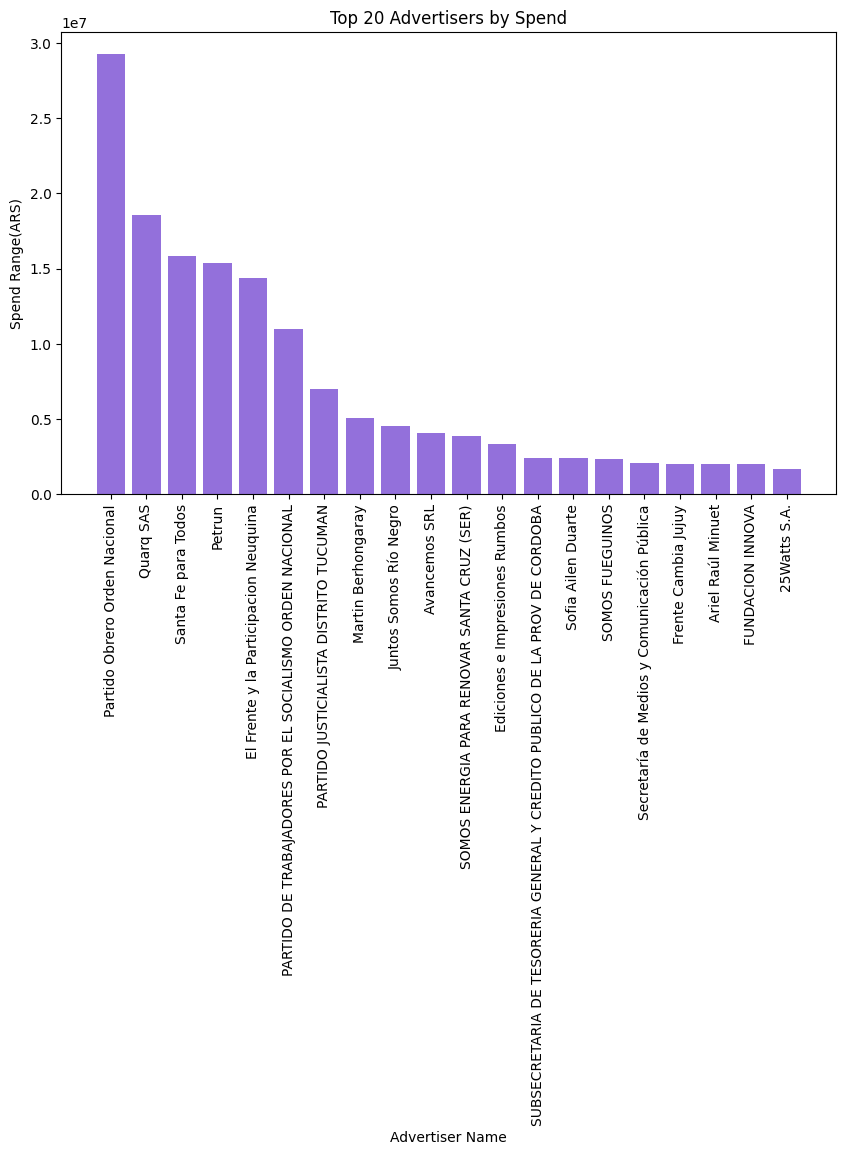

In [27]:
# Creating a mapping dictionary from Advertiser_ID to Advertiser_Name
id_to_name_mapping = df_ads.set_index('Advertiser_ID')['Advertiser_Name'].to_dict()

# Getting top 20 advertisers
df_top_advertisers_by_name= df_ads.groupby('Advertiser_ID').agg({'Spend_Range_Max_ARS': 'sum'}).nlargest(20, 'Spend_Range_Max_ARS').reset_index()

# Changing from IDs to names using that mapping 
df_top_advertisers_by_name['Advertiser_Name'] = df_top_advertisers_by_name['Advertiser_ID'].map(id_to_name_mapping)

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_top_advertisers_by_name['Advertiser_Name'], df_top_advertisers_by_name['Spend_Range_Max_ARS'], color='mediumpurple')

# Customizing the plot
plt.xlabel('Advertiser Name')
plt.ylabel('Spend Range(ARS)')
plt.title('Top 20 Advertisers by Spend')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()